# 深度神经网络 AlexNet

In [1]:
import torch
from torch import nn
import d2l.torch as d2l

定义网络结构

In [2]:
net = nn.Sequential(
    # 11*11 更大的窗口来捕捉对象, 设置步幅为 4 减少输出的高度和宽度, 设置更多的 output_channel
    nn.Conv2d(1, 96, kernel_size=11, stride=4, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    # 使用填充为 2 来保持输入和输出的高宽一致, 增大输出的通道数
    nn.Conv2d(96, 256, kernel_size=5, padding=2), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    # 保证高宽一致的同时使用三个卷积窗口
    nn.Conv2d(256, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 384, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(384, 256, kernel_size=3, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=3, stride=2),
    # 之后使用全连接层进行连接, 并且使用 dropout 来减轻过拟合
    nn.Flatten(),
    nn.Linear(6400, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 4096), nn.ReLU(),
    nn.Dropout(p=0.5),
    nn.Linear(4096, 10)
)

观察 AlexNet 的网络架构

In [3]:
X = torch.randn(1, 1, 224, 224)
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__, 'output shape:\t', X.shape)

Conv2d output shape:	 torch.Size([1, 96, 54, 54])
ReLU output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Conv2d output shape:	 torch.Size([1, 256, 26, 26])
ReLU output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 256, 12, 12])
ReLU output shape:	 torch.Size([1, 256, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 256, 5, 5])
Flatten output shape:	 torch.Size([1, 6400])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1,

读取数据集

In [4]:
batch_size = 128
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)

训练 AlexNet

loss 0.050, train acc 0.981, test acc 0.926
2196.8 examples/sec on cuda:0


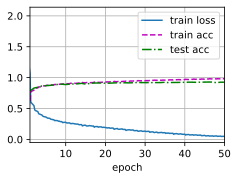

In [6]:
learning_rate, num_epochs = 0.02, 50
d2l.train_ch6(net, train_iter, test_iter, num_epochs, learning_rate, d2l.try_gpu())

loss 0.048, train acc 0.983, test acc 0.926
1548.5 examples/sec on cuda:0


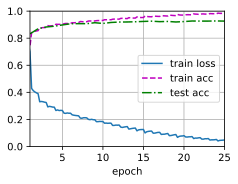

In [6]:
learning_rate, batch_size, num_epochs = 0.02, 32, 25
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, learning_rate, d2l.try_gpu(), ylim=[0.0, 1.0])

loss 0.167, train acc 0.937, test acc 0.889
2233.1 examples/sec on cuda:0


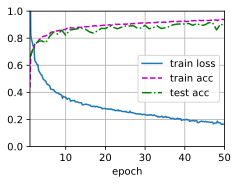

In [7]:
learning_rate, batch_size, num_epochs = 0.03, 512, 50
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, resize=224)
d2l.train_ch6(net, train_iter, test_iter, num_epochs, learning_rate, d2l.try_gpu(), ylim=[0.0, 1.0])